# <center>Security Monitoring System</center>

#### <center>Most cyber solution solutions don't distinguish between everyday malware and advanced targeted attacks. Important alerts get lost in the noise of unimportant alerts, allowing attacks to breach security.  </center>

The solution is divided into multiple steps which are:
1. Convert the given Dataset from Json to CSV along with wrangling of Data
2. Preprocessing of Data which included feature engineering on Date-Time, dealing with categorical features, encoding the data and scaling the data.
3. Used K-Means for clustering similar data groups and patterns to identify outliers in dataset
4. Used Principal Component Analysis in order to visualise cluster of datasets.
5. Used Long Short Term Memory (LSTM) Networks inorder to identify malicious patterns in time series log.

In [13]:
#Importing Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from  sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.spatial.distance import cdist


## Step 1: Convert the given Dataset from Json to CSV

#### Run the following R code to convert the required JSON dataseet into a CSV file. 

#Install required R packages

library(jsonlite)

#Read the JSON file 

log<- fromJSON("output.json", flatten=TRUE)

#Store each data frame in a log table

log_table = data.frame(log)

#Write the table to a CSV file

write.csv(log_table[,c(1:10)], file="output.csv",row.names=FALSE)


In [5]:
#Import CSV data

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_8681a3baf2ff4fdc8fc7cb341e6faff6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2B1RbhJ9pdEcoF21dlXb9fukDuVV_p5e_Z475-ZFcJnO',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8681a3baf2ff4fdc8fc7cb341e6faff6.get_object(Bucket='kmeansclusteringwithdnnb7d592a69aa14a2fbdca2a069a215a34',Key='a1Finalok_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body, encoding = 'latin1')
df_data_2.head()



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Keywords,Source,Source_AddrScheme,Source_IP,Day,Month,Year,Hour,Min,Sec,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Warning,VMwareTools,STATIC,192.168.1.45,14,3,2018,15,39,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Warning,VMwareTools,STATIC,192.168.1.45,14,3,2018,15,39,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Warning,VMwareTools,STATIC,192.168.1.45,14,3,2018,15,39,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warning,VMwareTools,STATIC,192.168.1.45,14,3,2018,15,39,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Warning,VMwareTools,STATIC,192.168.1.45,14,3,2018,15,42,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Preprocessing of Data which included feature engineering on Date-Time, dealing with categorical features, encoding the data and scaling the data.

Feature Engineering- Extracted the Date-Time parameter and splitted each into DD-MM-YYYY and Hours-Minute-Seconds

Categorical Features & encoding the data - Categorising each keywords and labelled encoding the features ( Keywords, Source , Source_AddrScheme, Hostname) and normalized the same using One Hot Encoder

In [6]:
#Entering default for NULL entries

NewData = df_data_2.iloc[:,:13].values

In [9]:
# Binary Encoder

dataset = df_data_2
dataset.drop('Source_IP',axis=1, inplace=True)
dataset.drop('Year',axis=1, inplace=True)
X = dataset.iloc[:,0:10].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_x = LabelEncoder()
X[:,0] = le_x.fit_transform(X[:,0])

lex_x1 = LabelEncoder()
X[:,1] = lex_x1.fit_transform(X[:,1])

lex_x2 = LabelEncoder()
X[:,2] = lex_x2.fit_transform(X[:,2])

lex_x3 = LabelEncoder()
X[:,8] = lex_x3.fit_transform(X[:,8])

onehotencoder = OneHotEncoder(categorical_features="all")
X = onehotencoder.fit_transform(X).toarray()

## Step 3: Used K-Means for clustering similar data groups and patterns to identify outliers in dataset


In [14]:
#Kmeans for hyperparameter selection

Kr = [2, 4, 6, 8, 10, 12, 16, 18, 24, 28, 32]
distortions = []

for k in Kr:
    print("Clusters: "+str(k))
    kmeans_model = KMeans(n_clusters= k, init = 'k-means++', n_init = 10, max_iter = 500).fit(X)
    label = kmeans_model.labels_
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print("The average silhouette_score is :"+str(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]))


Clusters: 2
The average silhouette_score is :1.81002379934
Clusters: 4
The average silhouette_score is :1.74584744919
Clusters: 6
The average silhouette_score is :1.67965562353
Clusters: 8
The average silhouette_score is :1.6172304416
Clusters: 10
The average silhouette_score is :1.57293885543
Clusters: 12
The average silhouette_score is :1.51731007333
Clusters: 16
The average silhouette_score is :1.46332360946
Clusters: 18
The average silhouette_score is :1.45310414224
Clusters: 24
The average silhouette_score is :1.40718456179
Clusters: 28
The average silhouette_score is :1.37722443496
Clusters: 32
The average silhouette_score is :1.35450758977


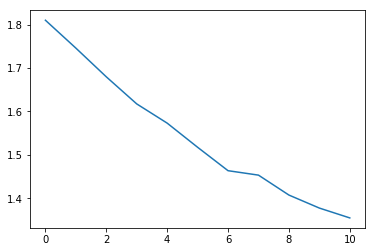

In [16]:
#Plot the data and try to find a Elbow in the graph 
plt.plot(distortions)

In [83]:
# Using optimum Number of Clusters = 8

kmeans_model = KMeans(n_clusters= 8, init = 'k-means++', n_init = 20, max_iter = 2000).fit(X)

In [84]:
# Output Parameters of K-Mean

labels = kmeans_model.labels_
cluster_centers = kmeans_model.cluster_centers_
squared_distance = kmeans_model.inertia_
Prediction = kmeans_model.predict(X)

Prediction = np.reshape(Prediction, (-1,1))
print("Labels : "+str(labels))
print("Labels Shape: "+str(labels.shape))
print("Cluster Points : "+str(cluster_centers))
print("Squared Distance : "+str(squared_distance))
print("Output Shape"+str(Prediction.shape))

Labels : [1 1 1 ..., 3 3 3]
Labels Shape: (84141,)
Cluster Points : [[  1.04354459e-18  -7.94178091e-18  -7.94178091e-18 ...,  -1.06685494e-16
    4.17417836e-18   1.04354459e-18]
 [  5.60522407e-05   1.68156722e-04   1.68156722e-04 ...,   1.68156722e-03
    1.68156722e-04   4.39440693e-18]
 [  1.08081404e-18  -1.16145158e-17  -1.16145158e-17 ...,   2.69759914e-04
    4.32325616e-18   1.08081404e-18]
 ..., 
 [  1.07742591e-18  -1.10995197e-17  -1.10995197e-17 ...,   1.68634064e-03
    2.81056773e-04   1.07742591e-18]
 [  9.35124374e-19   2.27682456e-18   2.27682456e-18 ...,   6.02816408e-17
    3.74049750e-18   9.35124374e-19]
 [  1.07742591e-18  -1.10859672e-17  -1.10859672e-17 ...,   1.68681473e-03
    4.30970364e-18   1.07742591e-18]]
Squared Distance : 227449.60539
Output Shape(84141, 1)


## Step 4: Used Principal Component Analysis in order to visualise cluster of datasets.

In [85]:
# Visualize the Data

pca = PCA(n_components = 2)
X_New = pca.fit_transform(X)

final = np.concatenate((X_New, Prediction), axis = 1)
print("Final Shape: "+str(final.shape))



Final Shape: (84141, 3)


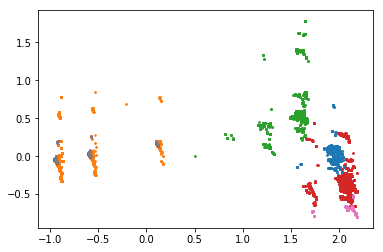

In [86]:
plt.figure()

for i in range(16):
    indexes = final[:,2] == i
    plt.scatter(final[indexes, 0], final[indexes, 1], s = 2)

plt.show()

In [87]:
print("Retention of variance:")
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

Retention of variance:
[ 1.76872628  0.18377539]
[ 0.34947549  0.03631144]
[ 0.34947549  0.38578692]


In [93]:
# Output the clustered visualised data and perform manual analysis to determine anomalies and patterns in the data

for i in range(8):
    indexes = final[:,2] == i
    # df_data_2[indexes] 8 outputs

## Step 5: Used Long Short Term Memory (LSTM) Networks inorder to identify malicious patterns in time series log

In [94]:
# Concatenating Kmeans Predictions with Input Data to create input Data for RNN Classification

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [95]:
# Creating Train_x and Train_Y

Train_x = X
Train_y = Prediction

print("Train X"+str(Train_x.shape))
print("Train Y"+str(Train_y.shape))

Train X(84141, 231)
Train Y(84141, 1)


In [101]:
# Building function model
def build_model(layers = [231, 8, 100, 50]):
    
    model = Sequential()
    
    model.add(LSTM(input_dim=layers[0],output_dim=layers[1],input_shape=Train_x.shape,return_sequences=True))
    
    model.add(LSTM(layers[2], return_sequences=False))
    
    model.add(Dense(output_dim=layers[3]))
    
    model.add(Activation("softmax"))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [ ]:
model = build_model()

model.fit(Train_x,Train_y, batch_size=64, nb_epoch=5000, validation_split=0.05)